In [100]:
import pickle
import random
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from tqdm import tqdm

In [9]:
wmt19_toen = pickle.load(open('../7_28-system-level_bleurt/wmt19_toen_bleurt.pkl', 'rb'))
wmt19_toen.head(1)

,system,sid,raw_score,score,N,lp,reference,source,output,year,bleurt
27600,DBMS-KU-KKEN.6726,751,2.0,-1.463163,1,kk-en,Three professional boxers from Kazakhstan will...,Қазақстандық үш кәсіпқой боксшы Мәскеуде жекпе...,three кәсіпқой қазақстандық боксшы өткізеді же...,2019,-1.62813


In [126]:
trials = 1000

100%|██████████| 1000/1000 [00:20<00:00, 48.39it/s]


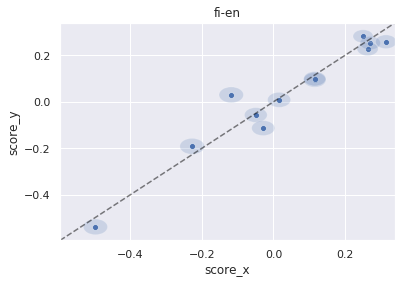

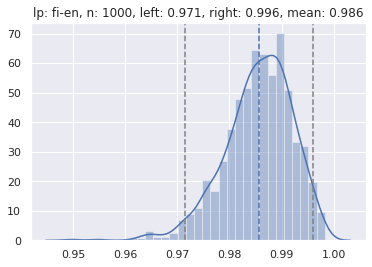

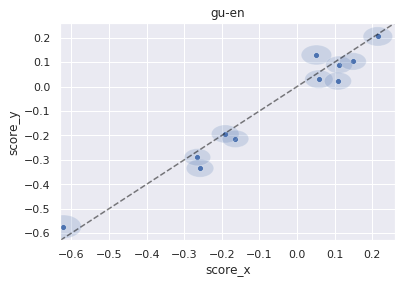

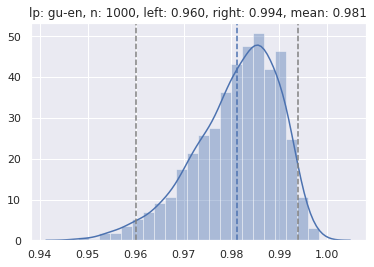

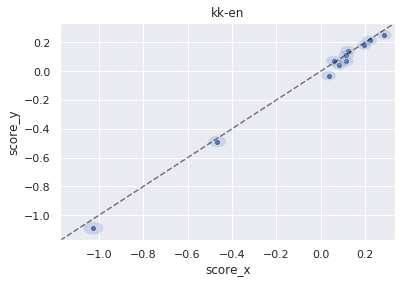

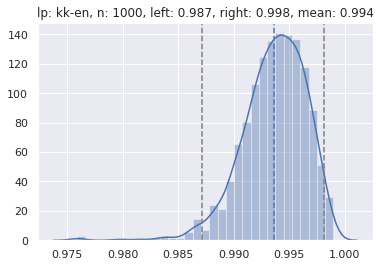

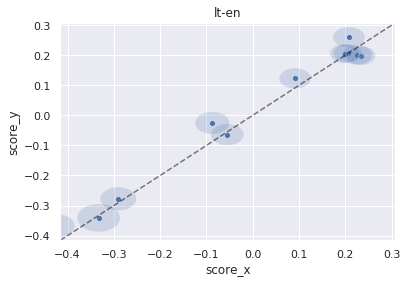

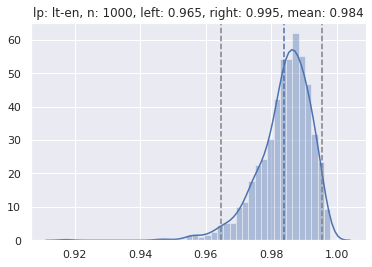

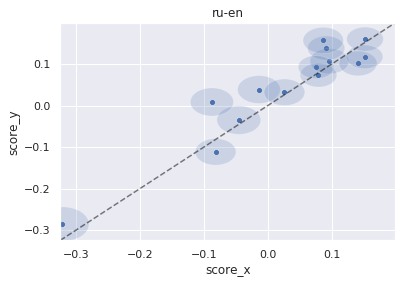

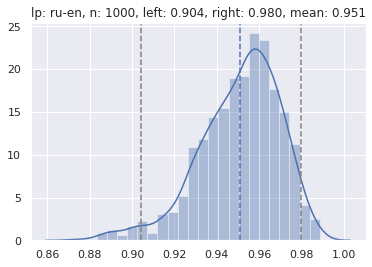

In [129]:
for lp, group in wmt19_toen.groupby(['lp']):
    sids = group.sid.unique()
    
    rs = []
    for i in tqdm(range(0, trials)):
        chosen = np.random.choice(sids, int(len(sids)/2), replace=False)
        A = group[group.sid.isin(chosen)]
        B = group[~group.sid.isin(chosen)]
        A_scores = A.groupby('system').mean()
        B_scores = B.groupby('system').mean()
        merged = pd.merge(A_scores, B_scores, on=['system'])
        r = merged.corr()['score_x']['score_y']
        rs.append(r)
    
    plt.figure()
    plt.title(lp)
    ax = sns.scatterplot(x='score_x', y='score_y', data=merged)
    ax.axis('tight')
    plt.xlim(plt.ylim())
    
    # y = x
    xpoints = ypoints = ax.get_xlim()
    ax.plot(xpoints, ypoints, linestyle='--', color='black', alpha=0.5, scalex=False, scaley=False)
    
    # circles
    for i, row in merged.iterrows():
        # we are using the se of groupA 
        # but stderr(groupA) ~= stderr(groupB)
        A_sys = A[A.system == row.name]
        stderr = A_sys['score'].std() / np.sqrt(len(A_sys))
        a_circle = plt.Circle((row['score_x'], row['score_y']), radius=stderr, alpha=0.2)
        ax.add_artist(a_circle)
    
    ###
    # distplot
    plt.figure()
    ax = sns.distplot(rs)
    up, down = plt.ylim()
    left = np.quantile(rs, 0.025)
    right = np.quantile(rs, 0.975)
    mean = np.mean(rs)
    ax.axvline(left, up, down, linestyle='--', color='grey')
    ax.axvline(right, up, down, linestyle='--', color='grey')
    ax.axvline(mean, up, down, linestyle='--')
    plt.title('lp: %s, n: %d, left: %.3f, right: %.3f, mean: %.3f' % (lp, trials, left, right, mean))

100%|██████████| 1000/1000 [00:23<00:00, 43.45it/s]


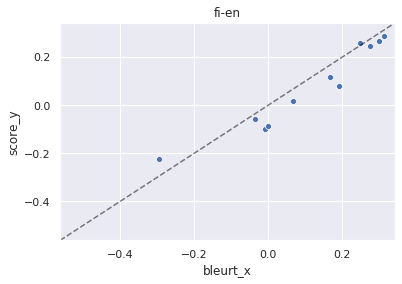

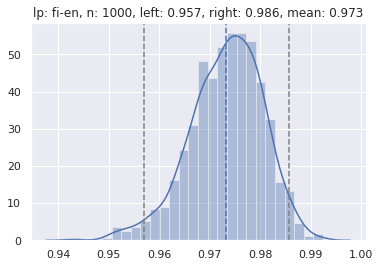

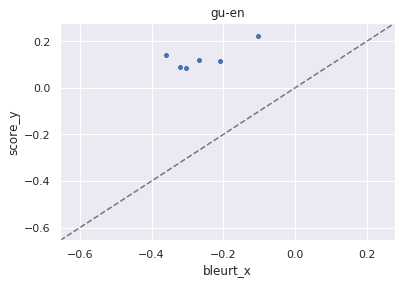

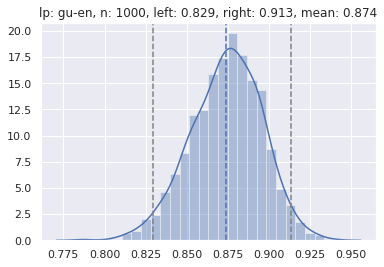

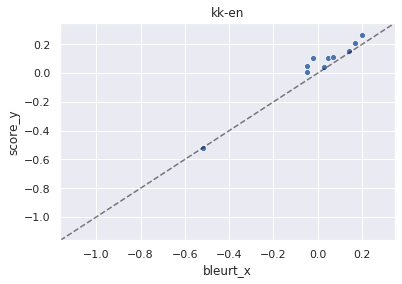

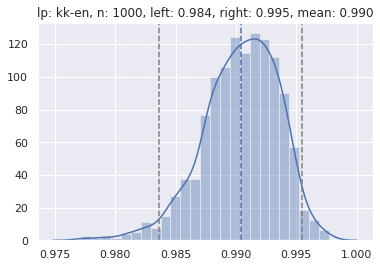

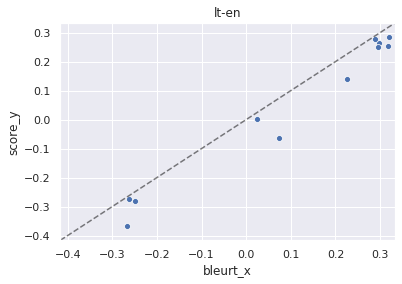

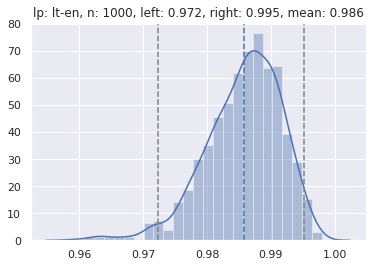

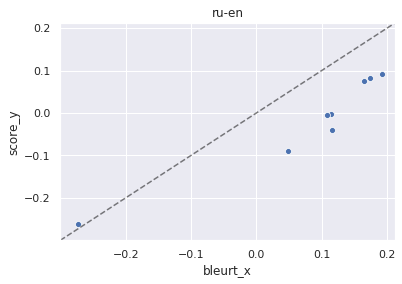

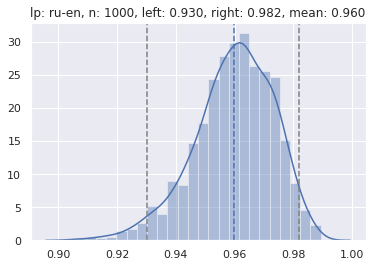

In [132]:
for lp, group in wmt19_toen.groupby(['lp']):
    sids = group.sid.unique()
    
    rs = []
    for i in tqdm(range(0, trials)):
        chosen = np.random.choice(sids, int(len(sids)/2), replace=False)
        A = group[group.sid.isin(chosen)]
        B = group[~group.sid.isin(chosen)]
        A_scores = A.groupby('system').mean()
        B_scores = B.groupby('system').mean()
        merged = pd.merge(A_scores, B_scores, on=['system'])
        r = merged.corr()['bleurt_x']['score_y']
        rs.append(r)
    
    plt.figure()
    plt.title(lp)
    ax = sns.scatterplot(x='bleurt_x', y='score_y', data=merged)
    ax.axis('tight')
    plt.xlim(plt.ylim())
    
    # y = x
    xpoints = ypoints = ax.get_xlim()
    ax.plot(xpoints, ypoints, linestyle='--', color='black', alpha=0.5, scalex=False, scaley=False)

    
    ###
    # distplot
    plt.figure()
    ax = sns.distplot(rs)
    up, down = plt.ylim()
    left = np.quantile(rs, 0.025)
    right = np.quantile(rs, 0.975)
    mean = np.mean(rs)
    ax.axvline(left, up, down, linestyle='--', color='grey')
    ax.axvline(right, up, down, linestyle='--', color='grey')
    ax.axvline(mean, up, down, linestyle='--')
    plt.title('lp: %s, n: %d, left: %.3f, right: %.3f, mean: %.3f' % (lp, trials, left, right, mean))

100%|██████████| 1000/1000 [00:23<00:00, 42.93it/s]


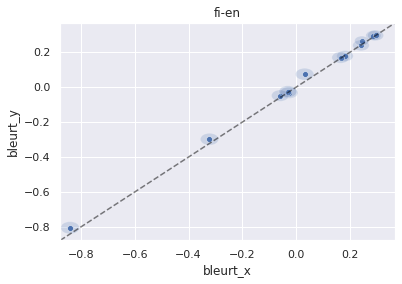

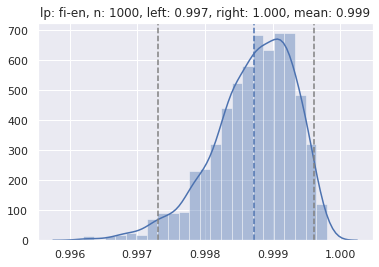

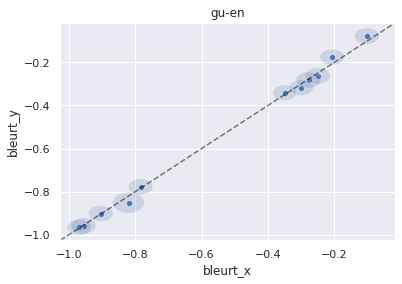

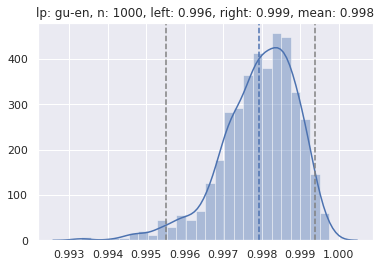

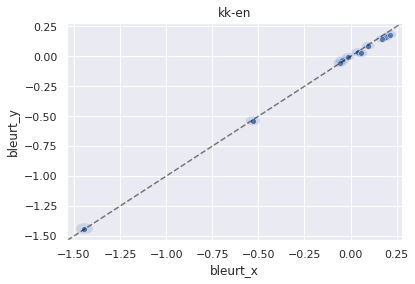

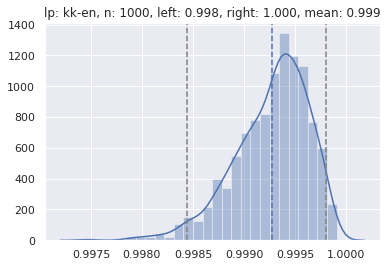

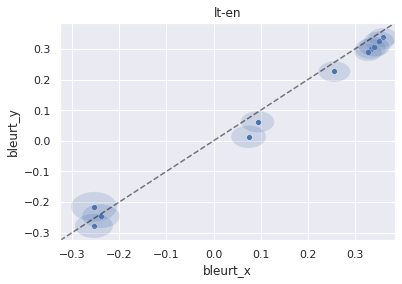

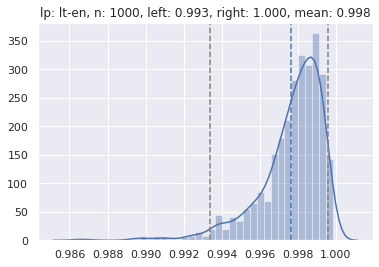

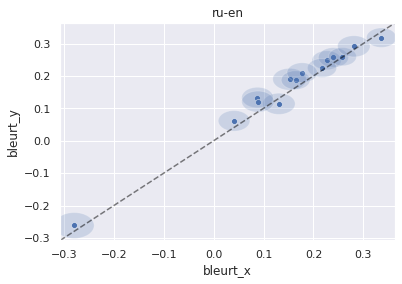

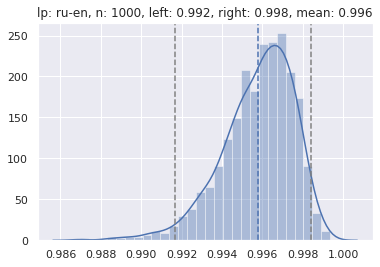

In [131]:
for lp, group in wmt19_toen.groupby(['lp']):
    sids = group.sid.unique()
    
    rs = []
    for i in tqdm(range(0, trials)):
        chosen = np.random.choice(sids, int(len(sids)/2), replace=False)
        A = group[group.sid.isin(chosen)]
        B = group[~group.sid.isin(chosen)]
        A_scores = A.groupby('system').mean()
        B_scores = B.groupby('system').mean()
        merged = pd.merge(A_scores, B_scores, on=['system'])
        r = merged.corr()['bleurt_x']['bleurt_y']
        rs.append(r)
    
    plt.figure()
    plt.title(lp)
    ax = sns.scatterplot(x='bleurt_x', y='bleurt_y', data=merged)
    ax.axis('tight')
    plt.xlim(plt.ylim())
    
    # y = x
    xpoints = ypoints = ax.get_xlim()
    ax.plot(xpoints, ypoints, linestyle='--', color='black', alpha=0.5, scalex=False, scaley=False)
    
    # circles
    for i, row in merged.iterrows():
        # we are using the se of groupA 
        # but stderr(groupA) ~= stderr(groupB)
        A_sys = A[A.system == row.name]
        stderr = A_sys['score'].std() / np.sqrt(len(A_sys))
        a_circle = plt.Circle((row['bleurt_x'], row['bleurt_y']), radius=stderr, alpha=0.2)
        ax.add_artist(a_circle)
    
    ###
    # distplot
    plt.figure()
    ax = sns.distplot(rs)
    up, down = plt.ylim()
    left = np.quantile(rs, 0.025)
    right = np.quantile(rs, 0.975)
    mean = np.mean(rs)
    ax.axvline(left, up, down, linestyle='--', color='grey')
    ax.axvline(right, up, down, linestyle='--', color='grey')
    ax.axvline(mean, up, down, linestyle='--')
    plt.title('lp: %s, n: %d, left: %.3f, right: %.3f, mean: %.3f' % (lp, trials, left, right, mean))